# NFCORPUS

NFCorpus is a full-text English retrieval data set for Medical Information Retrieval. It contains a total of 3,244 natural language queries (written in non-technical English, harvested from the NutritionFacts.org site) with 169,756 automatically extracted relevance judgments for 9,964 medical documents (written in a complex terminology-heavy language), mostly from PubMed.

#### Terms of Use
NFCorpus is free to use for academic purposes. For any other uses of the included NutritionFacts.org data please consult Terms of Service and contact its author Dr. Michael Greger directly.
If you use the corpus in your work, please cite: (Boteva et al., 2016).

In [5]:
import pandas as pd
import ir_datasets
import matplotlib.pyplot as plt
import itertools
import collections
from nltk.corpus import stopwords

dataset = ir_datasets.load("beir/nfcorpus")
dataset_dev = ir_datasets.load("beir/nfcorpus/dev")
dataset_train = ir_datasets.load("beir/nfcorpus/train")
dataset_test = ir_datasets.load("beir/nfcorpus/test")

## Create a dataframe with the documents, queries and qrels

In [6]:
# Dataframe with the documents
df_docs = pd.DataFrame(dataset.docs_iter())
df_docs

,doc_id,text,title,url
0,MED-10,"Recent studies have suggested that statins, an...",Statin Use and Breast Cancer Survival: A Natio...,http://www.ncbi.nlm.nih.gov/pubmed/25329299
1,MED-14,BACKGROUND: Preclinical studies have shown tha...,Statin use after diagnosis of breast cancer an...,http://www.ncbi.nlm.nih.gov/pubmed/25304447
2,MED-118,The aims of this study were to determine the c...,Alkylphenols in human milk and their relations...,http://www.ncbi.nlm.nih.gov/pubmed/20435081%20
3,MED-301,Epilepsy or seizure disorder is one of the mos...,Methylmercury: A Potential Environmental Risk ...,http://www.ncbi.nlm.nih.gov/pubmed/22206970
4,MED-306,Hit Reaction Time latencies (HRT) in the Conti...,Sensitivity of Continuous Performance Test (CP...,http://www.ncbi.nlm.nih.gov/pubmed/20699117
...,...,...,...,...
3628,MED-917,Scottish-grown red raspberries are a rich sour...,Effect of freezing and storage on the phenolic...,http://www.ncbi.nlm.nih.gov/pubmed/12188629
3629,MED-941,BACKGROUND: Common warts (verruca vulgaris) ar...,Topical vitamin A treatment of recalcitrant co...,http://www.ncbi.nlm.nih.gov/pubmed?term=cider%...
3630,MED-942,Apple cider vinegar products are advertised in...,Esophageal injury by apple cider vinegar table...,http://www.ncbi.nlm.nih.gov/pubmed/15983536
3631,MED-952,The use of cannabis is embedded within many so...,Cannabis and the lung.,http://www.ncbi.nlm.nih.gov/pubmed/21132143


In [7]:
# Create a dataframe with the queries
df_queries = pd.DataFrame(dataset.queries_iter())
df_queries

,query_id,text,url
0,PLAIN-3,Breast Cancer Cells Feed on Cholesterol,http://nutritionfacts.org/2015/07/14/breast-ca...
1,PLAIN-4,Using Diet to Treat Asthma and Eczema,http://nutritionfacts.org/2015/07/09/using-die...
2,PLAIN-5,Treating Asthma With Plants vs. Pills,http://nutritionfacts.org/2015/07/07/treating-...
3,PLAIN-6,How Fruits and Vegetables Can Treat Asthma,http://nutritionfacts.org/2015/07/02/how-fruit...
4,PLAIN-7,How Fruits and Vegetables Can Prevent Asthma,http://nutritionfacts.org/2015/06/30/how-fruit...
...,...,...,...
3232,PLAIN-3432,Healthy Chocolate Milkshakes,http://nutritionfacts.org/video/healthy-chocol...
3233,PLAIN-3442,The Healthiest Vegetables,http://nutritionfacts.org/video/the-healthiest...
3234,PLAIN-3452,Bowel Movement Frequency,http://nutritionfacts.org/video/bowel-movement...
3235,PLAIN-3462,Olive Oil and Artery Function,http://nutritionfacts.org/video/olive-oil-and-...


In [8]:
# Crete a dataframe with the qrels nfcorpus/dev, nfcorpustest, nfcorpus/train together
df_qrels_dev = pd.DataFrame(dataset_dev.qrels_iter())
df_qrels_train = pd.DataFrame(dataset_train.qrels_iter())
df_qrels_test = pd.DataFrame(dataset_test.qrels_iter())
df_qrels = pd.concat([df_qrels_dev, df_qrels_train, df_qrels_test])
df_qrels

,query_id,doc_id,relevance,iteration
0,PLAIN-1,MED-2421,2,0
1,PLAIN-1,MED-2422,2,0
2,PLAIN-1,MED-2416,2,0
3,PLAIN-1,MED-2423,2,0
4,PLAIN-1,MED-2417,2,0
...,...,...,...,...
12329,PLAIN-3472,MED-3623,1,0
12330,PLAIN-3472,MED-3624,1,0
12331,PLAIN-3472,MED-3625,1,0
12332,PLAIN-3472,MED-3626,1,0


## Documents Analysis

Medical documents data (.docs files) – medical, very technical language

#### Number of documents

NFcorpus has a total of 3633 documents.
Each document has a unique identifier, a title , a text corresponding to the "Abstract" section in PubMed and a url to the article in PubMed.

In [9]:
dataset.docs_count()

3633

### Mean of the number of words in the documents (text section)

The mean of the number of words in the documents is 220.97.
The Max number of words in a document is  1460 and the Min number is 13

In [10]:
df_docs['n_words'] = df_docs['text'].apply(lambda x: len(str(x).split()))
float(df_docs['n_words'].mean())

220.97880539499036

### Distribution of Documents by Word Count

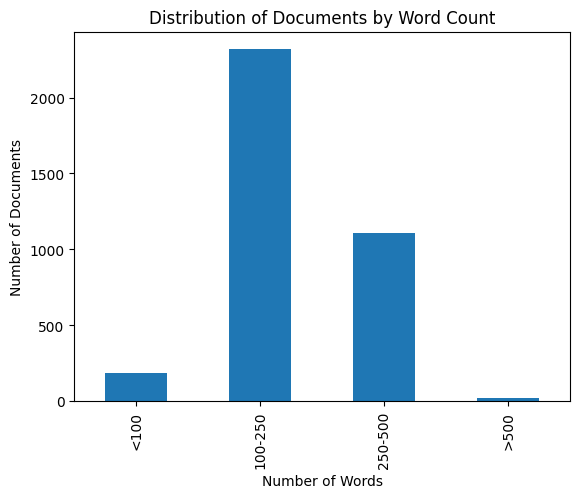

In [11]:
bins = [0,100,250, 500, float('inf')]
labels = ['<100','100-250', '250-500', '>500']

# Criação da nova coluna 'word_category'
df_docs['word_category'] = pd.cut(df_docs['n_words'], bins=bins, labels=labels)

# Contagem dos documentos em cada categoria
doc_counts = df_docs['word_category'].value_counts().sort_index()

# Criação do gráfico de barras
doc_counts.plot.bar()
plt.xlabel('Number of Words')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents by Word Count')
plt.show()

### Named Entity Recognition (NER)

In [129]:
import spacy
from collections import Counter

# Carregar modelo de NER do spaCy
nlp = spacy.load("en_core_web_sm")

# Aplicar NER em cada documento
docs = [nlp(doc) for doc in df_docs['text']]


entities = [(ent.text, ent.label_) for doc in docs for ent in doc.ents]


C:\Users\guiva\AppData\Local\Temp\ipykernel_21640\3977279665.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Label', data=entity_counts, palette='Blues_d')


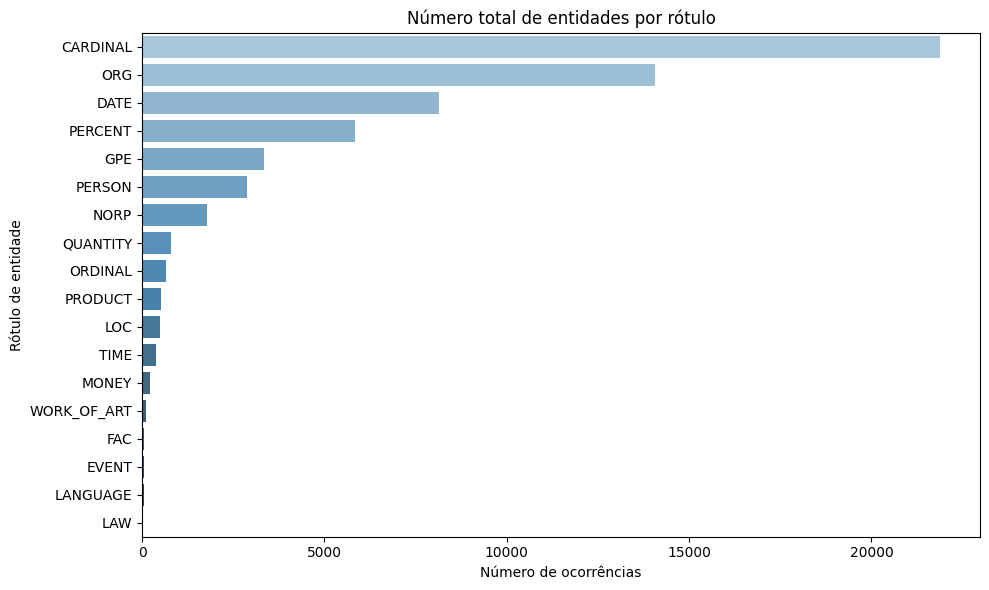


Exemplos de entidades por rótulo:

NORP: ['statin', 'English']
GPE: ['Finland', 'UK']
DATE: ['1995–2003', '3.25 years']
CARDINAL: ['31,236', '4,151']
ORG: ['the Finnish Cancer Registry', 'BACKGROUND']
PERSON: ['statin', 'Epilepsy']
PERCENT: ['60.2%', '95%']
WORK_OF_ART: ['CI 0.38–0.55 and HR 0.54', 'E2 (p=0.76']
QUANTITY: ['4-octylphenol', '0.3-0.6']
ORDINAL: ['first', 'second']
TIME: ['10 minutes', 'the first two minutes']
MONEY: ['216 mg/100', '50 g than 25']
PRODUCT: ['P450', 'Cochrane']
LOC: ['Friedewald', 'Peruvian Andes']
EVENT: ['the Atherosclerosis Risk', 'the 2002 World Health Assembly']
LAW: ['≤ 39', '5HT3']
FAC: ['Aspartate', 'the Lifestyle Center of America']
LANGUAGE: ['English', 'Spanish']


In [144]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

entity_freq = Counter(entities)

# Criar um DataFrame com as entidades, seus rótulos e frequências
df_entities = pd.DataFrame(entity_freq.items(), columns=["Entity", "Frequency"])
df_entities[['Text', 'Label']] = pd.DataFrame(df_entities['Entity'].tolist(), index=df_entities.index)
df_entities.drop('Entity', axis=1, inplace=True)

# Agrupar por Label (rótulo de entidade) e contar quantas entidades existem de cada tipo
entity_counts = df_entities.groupby('Label')['Frequency'].sum().reset_index()

# Ordenar os rótulos pela contagem
entity_counts = entity_counts.sort_values(by='Frequency', ascending=False)

# Criar um gráfico de barras com a contagem total de entidades por rótulo
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Label', data=entity_counts, palette='Blues_d')

# Adicionar título e rótulos
plt.title('Número total de entidades por rótulo')
plt.xlabel('Número de ocorrências')
plt.ylabel('Rótulo de entidade')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

print("\nExemplos de entidades por rótulo:\n")
for label in df_entities['Label'].unique():
    examples = df_entities[df_entities['Label'] == label].head(2)['Text'].tolist()
    print(f"{label}: {examples}")

#### Documents with more citations


1º MED-5337 (329 queries), title: Intensive lifestyle changes may affect the progression of prostate cancer. 

2º MED-5341 (314 queries), title: Effects of a low-fat, high-fiber diet and exercise program on breast cancer risk factors in vivo and tumor cell growth and apoptosis in vitro.

3º MED-5328 (310 queries), title: Vegetarian diets and incidence of diabetes in the Adventist Health Study-2.

4º MED-5333 (296 queries), title: Vegetarian diet affects genes of oxidative metabolism and collagen synthesis.

5º MED-5339' (288 queries), title: Is Escherichia coli urinary tract infection a zoonosis? Proof of direct link with production animals and meat.

In [28]:
df_qrels_topdpc = df_qrels.groupby('doc_id')['query_id'].count()
df_qrels_topdpc

doc_id
MED-10      1
MED-1000    1
MED-1002    1
MED-1003    1
MED-1004    1
           ..
MED-994     2
MED-995     1
MED-996     1
MED-998     1
MED-999     1
Name: query_id, Length: 3633, dtype: int64

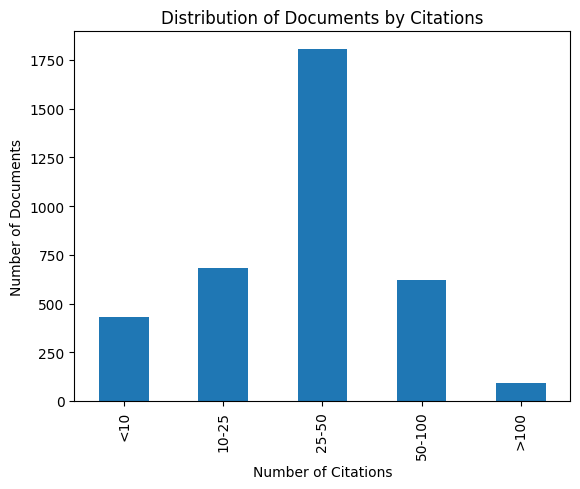

In [13]:
# Criação das categorias
bins = [0, 10, 25, 50, 100, float('inf')]
labels = ['<10','10-25', '25-50','50-100', '>100']

# Criação da nova coluna 'citation_category'
df_qrels_topdpc['citation_category'] = pd.cut(df_qrels_topdpc, bins=bins, labels=labels)

# Contagem dos documentos em cada categoria
doc_citation_counts = df_qrels_topdpc['citation_category'].value_counts().sort_index()

# Criação do gráfico de barras
doc_citation_counts.plot.bar()
plt.xlabel('Number of Citations')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents by Citations')
plt.show()

### Most common words in the documents

#### Temos uma lista com stopwords do nltk mas depois da análise aos resultados NER adicionaremos outras palavras a essa lista.

In [141]:
# Definir as stop words
from nltk.corpus import stopwords
import itertools
import collections

stop_words = set(stopwords.words('english'))

labels_to_add = {"TIME", "PERCENT", "ORDINAL", "MONEY", "CARDINAL", "DATE"}

for doc in docs:
    for ent in doc.ents:
        if ent.label_ in labels_to_add:
            stop_words.add(ent.text)

# Converter o texto para maiúsculas e dividir em palavras
words = df_docs['text'].str.lower().str.split()

# Achatar a lista de listas em uma única lista de palavras
words = list(itertools.chain(*words))

# Remover as stop words
words = [word for word in words if word not in stop_words]

# Contar a frequência de cada palavra
word_counts = collections.Counter(words)

# Exibir as palavras mais comuns
word_counts.most_common()

[('risk', 2822),
 ('=', 2304),
 ('dietary', 2023),
 ('intake', 2016),
 ('study', 1976),
 ('associated', 1973),
 ('cancer', 1962),
 ('may', 1899),
 ('patients', 1683),
 ('studies', 1667),
 ('diet', 1631),
 ('consumption', 1546),
 ('increased', 1425),
 ('food', 1403),
 ('total', 1383),
 ('effects', 1365),
 ('levels', 1325),
 ('significantly', 1310),
 ('also', 1242),
 ('health', 1216),
 ('results', 1206),
 ('compared', 1202),
 ('significant', 1197),
 ('high', 1114),
 ('effect', 1094),
 ('(p', 1086),
 ('using', 1073),
 ('disease', 1054),
 ('data', 1047),
 ('higher', 1033),
 ('among', 1019),
 ('women', 1013),
 ('p', 1013),
 ('human', 1012),
 ('used', 1001),
 ('<', 953),
 ('lower', 950),
 ('blood', 925),
 ('association', 901),
 ('breast', 886),
 ('concentrations', 874),
 ('results:', 851),
 ('treatment', 845),
 ('group', 844),
 ('however,', 831),
 ('found', 829),
 ('evidence', 823),
 ('subjects', 811),
 ('clinical', 805),
 ('exposure', 804),
 ('serum', 787),
 ('cell', 783),
 ('factors', 768)

##### Perceber se o dataset tem mais temas novos ou se é à volta dos mesmos, quanto mais baixo for o ttr menos temas diferentes eles tem porque as palavras unicas são muito poucas

In [142]:
# Filtrar as stopwords de domínio
filtered_words = [word for word in words if word.lower() not in stop_words]

# Número total de palavras (após remover as stopwords)
total_words = len(filtered_words)

# Número de palavras únicas (sem repetições, após remover as stopwords)
unique_words = len(set(filtered_words))

# Diversidade de vocabulário (Type-Token Ratio - TTR)
ttr = unique_words / total_words if total_words > 0 else 0

# Exibir os resultados
print(f"Total Words: {total_words}")
print(f"Unique Words: {unique_words}")
print(f"Type-Token-Ratio (TTR): {ttr:.4f}")

Total Words: 505678
Unique Words: 60486
Type-Token-Ratio (TTR): 0.1196


## Queries Analysis
NutritionFacts.org queries data (.queries files, 5 different types) – natural, non-technical language


#### Number of queries

NFCorpus contains a total of 3,237 natural language queries (written in non-technical English, harvested from the NutritionFacts.org site).
Each query has a unique identifier, a text which correspond to a title of a video (or a topic) in NutritionFacts.org and a url to the video.

In [146]:
dataset.queries_count()

3237

#### Mean of the number of words in the queries

The mean of the number of words in the queries is 3.32.
The Max number of words in a query is  18 and the Min number is 1

In [147]:
df_queries['n_words'] = df_queries['text'].apply(lambda x: len(str(x).split()))
float(df_queries['n_words'].mean())

3.318813716404078

#### Queries with more citations

1º Plain-812 (1363 docs), text: "Cancer" (625 videos)

2º Plain-1878 (1166 docs), text: "plant-based diets" (545 videos)

3º Plain-1585 (1155 docs), text: "meat" (504 videos)

4º Plain-2316 (1122 docs), text: "vegetables" (493 videos)

5º Plain-1226 (1076 docs), text: "fruit" (461 videos)

In [148]:
df_qrels_topquery = df_qrels.groupby('query_id')['doc_id'].count()
df_qrels_topquery

query_id
PLAIN-1        49
PLAIN-10       79
PLAIN-100      41
PLAIN-1000      4
PLAIN-1002     17
             ... 
PLAIN-995       1
PLAIN-996       3
PLAIN-997       2
PLAIN-998     744
PLAIN-999       1
Name: doc_id, Length: 3237, dtype: int64

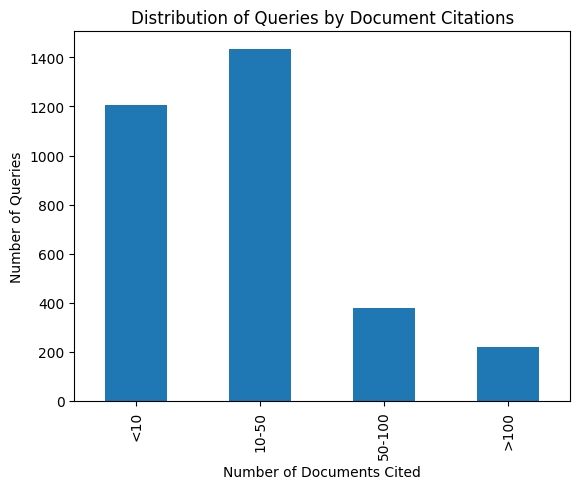

In [149]:
# Criação das categorias
bins = [0, 10, 50, 100, float('inf')]
labels = ['<10','10-50', '50-100', '>100']

# Criação da nova coluna 'doc_category'
df_qrels_topquery = df_qrels_topquery.to_frame(name='doc_count')
df_qrels_topquery['doc_category'] = pd.cut(df_qrels_topquery['doc_count'], bins=bins, labels=labels)

# Contagem das queries em cada categoria
query_doc_counts = df_qrels_topquery['doc_category'].value_counts().sort_index()

# Criação do gráfico de barras
query_doc_counts.plot.bar()
plt.xlabel('Number of Documents Cited')
plt.ylabel('Number of Queries')
plt.title('Distribution of Queries by Document Citations')
plt.show()

### Most common words in the queries

In [150]:
from nltk.corpus import stopwords
import itertools
import collections

# Converter o texto para maiúsculas e dividir em palavras
words = df_queries['text'].str.lower().str.split()

# Achatar a lista de listas em uma única lista de palavras
words = list(itertools.chain(*words))

# Remover as stop words
words = [word for word in words if word not in stop_words]

# Contar a frequência de cada palavra
word_counts = collections.Counter(words)

# Exibir as palavras mais comuns
word_counts.most_common() 

[('cancer', 147),
 ('diet', 103),
 ('health', 73),
 ('breast', 70),
 ('disease', 67),
 ('vs.', 66),
 ('meat', 62),
 ('food', 57),
 ('&', 56),
 ('tea', 47),
 ('you?', 46),
 ('good', 46),
 ('oil', 39),
 ('heart', 36),
 ('vitamin', 35),
 ('foods', 33),
 ('chicken', 33),
 ('prevent', 32),
 ('may', 31),
 ('cholesterol', 30),
 ('treating', 30),
 ('plant-based', 30),
 ('juice', 30),
 ('milk', 30),
 ('dietary', 28),
 ('fish', 27),
 ('fat', 27),
 ('preventing', 27),
 ('best', 27),
 ('diets', 26),
 ('beans', 26),
 ('acid', 25),
 ('risk', 25),
 ('fruit', 24),
 ('soy', 23),
 ('dr.', 23),
 ('blood', 21),
 ('diabetes', 21),
 ('supplements', 21),
 ('cancer?', 20),
 ('seeds', 20),
 ('study', 20),
 ('protein', 20),
 ('bad', 19),
 ('nuts', 19),
 ('much', 19),
 ('versus', 19),
 ('brain', 18),
 ('nutrition', 18),
 ('new', 17),
 ('cause', 17),
 ('eating', 17),
 ('pollutants', 17),
 ('liver', 17),
 ('rice', 16),
 ('turmeric', 16),
 ('safe?', 16),
 ('medicine', 16),
 ('treatment', 16),
 ('broccoli', 16),
 ('

### Named Entity Recognition

In [153]:
import spacy
from collections import Counter

# Carregar modelo de NER do spaCy
nlp = spacy.load("en_core_web_sm")

# Aplicar NER em cada documento
docs = [nlp(doc) for doc in df_queries['text']]


entities = [(ent.text, ent.label_) for doc in docs for ent in doc.ents]


C:\Users\guiva\AppData\Local\Temp\ipykernel_21640\3977279665.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Label', data=entity_counts, palette='Blues_d')


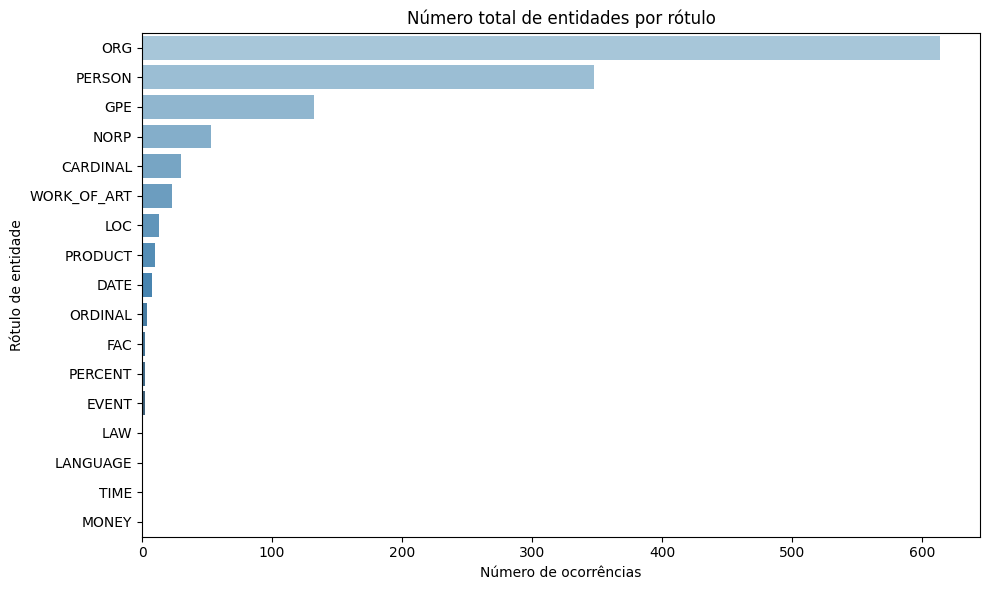


Exemplos de entidades por rótulo:

ORG: ['Breast Cancer Cells Feed', 'Eczema']
GPE: ['Chicken', 'Phytates']
PERSON: ['Rice', 'Favor Surgery']
NORP: ['Beans', 'Greens']
LOC: ['Pesticides', 'Asia']
WORK_OF_ART: ['The Reversal on Fish Oil', 'Get Enough Antioxidants Each Day']
CARDINAL: ['Four', 'Two']
FAC: ['the Egg-Cancer Link', 'Bad Egg']
DATE: ['Six Weeks', 'the first month']
EVENT: ['Probiotics During Cold Season', 'One Egg a Day']
ORDINAL: ['Second', 'second']
PRODUCT: ['Metamucil', 'Magic Bullets']
MONEY: ['3']
PERCENT: ['90%', '98%']
LAW: ['the Bible Belt']
LANGUAGE: ['English']
TIME: ['leeks']


In [154]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

entity_freq = Counter(entities)

# Criar um DataFrame com as entidades, seus rótulos e frequências
df_entities = pd.DataFrame(entity_freq.items(), columns=["Entity", "Frequency"])
df_entities[['Text', 'Label']] = pd.DataFrame(df_entities['Entity'].tolist(), index=df_entities.index)
df_entities.drop('Entity', axis=1, inplace=True)

# Agrupar por Label (rótulo de entidade) e contar quantas entidades existem de cada tipo
entity_counts = df_entities.groupby('Label')['Frequency'].sum().reset_index()

# Ordenar os rótulos pela contagem
entity_counts = entity_counts.sort_values(by='Frequency', ascending=False)

# Criar um gráfico de barras com a contagem total de entidades por rótulo
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Label', data=entity_counts, palette='Blues_d')

# Adicionar título e rótulos
plt.title('Número total de entidades por rótulo')
plt.xlabel('Número de ocorrências')
plt.ylabel('Rótulo de entidade')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

print("\nExemplos de entidades por rótulo:\n")
for label in df_entities['Label'].unique():
    examples = df_entities[df_entities['Label'] == label].head(2)['Text'].tolist()
    print(f"{label}: {examples}")

##### Perceber se o dataset tem mais temas novos ou se é à volta dos mesmos, quanto mais baixo for o ttr menos temas diferentes eles tem porque as palavras unicas são muito poucas

In [151]:

# Filtrar as stopwords de domínio
filtered_words = [word for word in words if word.lower() not in stop_words]

# Número total de palavras (após remover as stopwords)
total_words = len(filtered_words)

# Número de palavras únicas (sem repetições, após remover as stopwords)
unique_words = len(set(filtered_words))

# Diversidade de vocabulário (Type-Token Ratio - TTR)
ttr = unique_words / total_words if total_words > 0 else 0

# Exibir os resultados
print(f"Total Words: {total_words}")
print(f"Unique Words: {unique_words}")
print(f"Type-Token-Ratio (TTR): {ttr:.4f}")


Total Words: 8525
Unique Words: 3400
Type-Token-Ratio (TTR): 0.3988


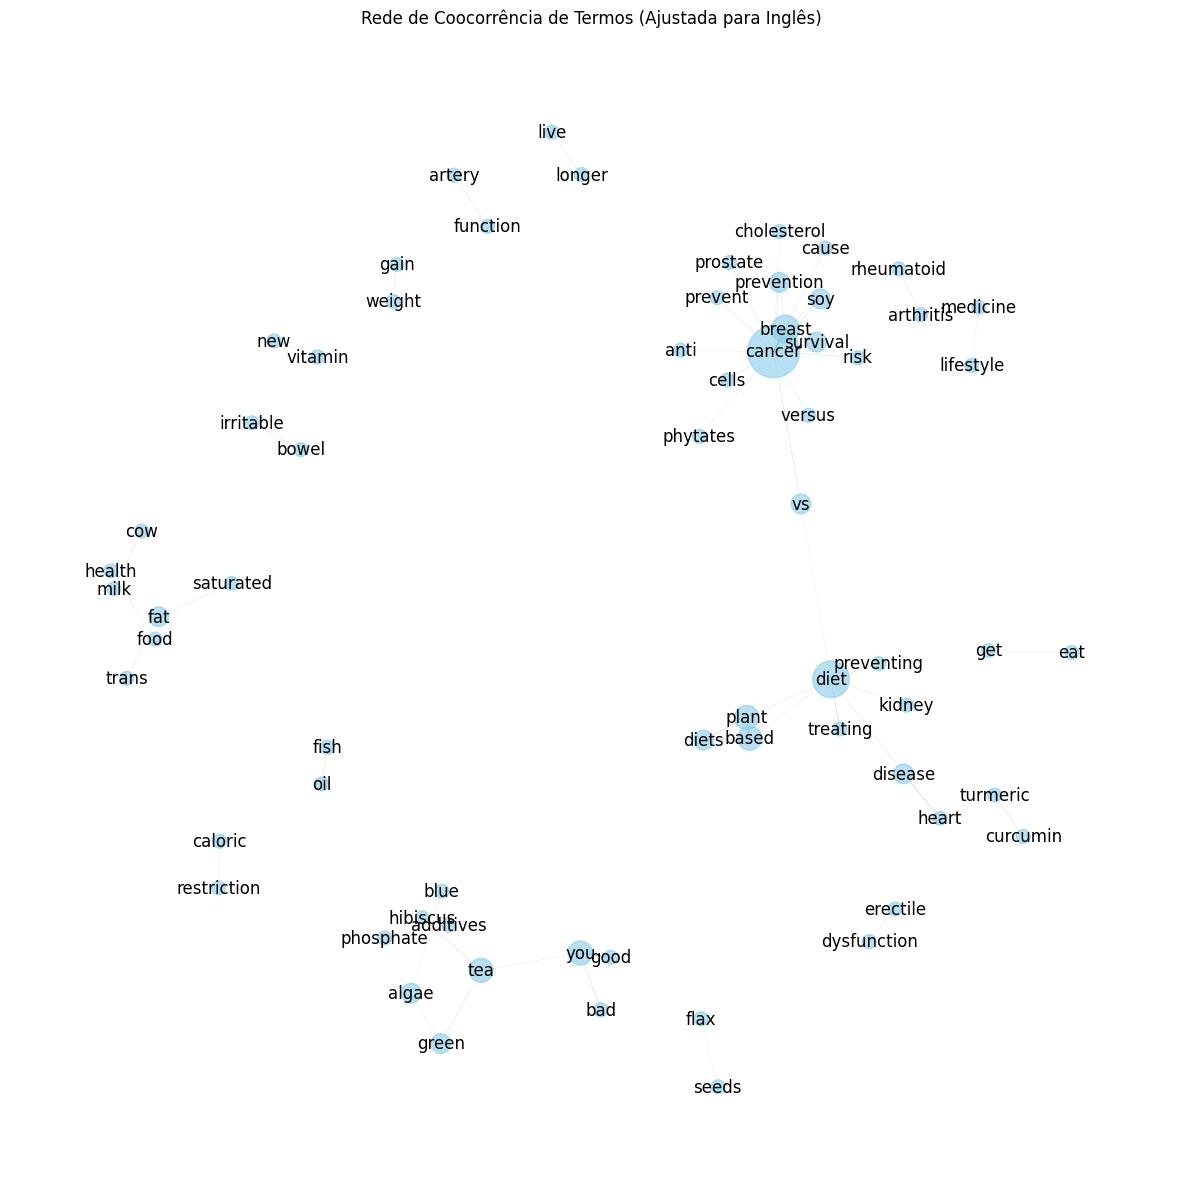

In [152]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Obtenha a lista de stopwords em inglês
stopwords = set(stopwords.words('english'))

# Filtrar os títulos para remover stopwords
filtered_titles = [' '.join([word for word in title.split() if word.lower() not in stopwords]) for title in df_queries['text']]

# Criar um vetor de contagem de termos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_titles)

# Criar a matriz de coocorrência
cooccurrence_matrix = (X.T @ X).toarray()

# Transformar em DataFrame
cooccurrence_df = pd.DataFrame(cooccurrence_matrix, index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# Criar um grafo
G = nx.Graph()

# Definir um limite de coocorrência
threshold = 5  # Ajuste este valor conforme necessário

for i, term in enumerate(cooccurrence_df.columns):
    for j in range(i + 1, len(cooccurrence_df.columns)):
        weight = cooccurrence_df.iloc[i, j]
        if weight > threshold:
            G.add_edge(term, cooccurrence_df.columns[j], weight=weight)

# Desenhar a rede
plt.figure(figsize=(15, 15))  # Aumentar o tamanho da figura
pos = nx.spring_layout(G,k=0.5)  # Ou experimente nx.circular_layout(G)

# Desenhar nós e arestas
node_size = [len(list(G.neighbors(node))) * 100 for node in G.nodes()]  # Tamanho dos nós baseado no grau
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.6)
edges = nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] / 100 for u, v in G.edges()], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Rede de Coocorrência de Termos (Ajustada para Inglês)")
plt.axis('off')
plt.show()


### Alternativa para ver palavras mais comuns

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização dos textos
vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_queries['text'])  # Substitua 'text' pelo campo de texto

# Obter as palavras com maior peso em cada documento
feature_names = vectorizer.get_feature_names_out()
top_keywords = sorted(list(zip(tfidf_matrix[0].toarray()[0], feature_names)), reverse=True)[:10]
print(top_keywords)


[(0.5684210485131928, 'feed'), (0.5143815396465087, 'cells'), (0.4245157270965096, 'cholesterol'), (0.3746914356687418, 'breast'), (0.30282316417716243, 'cancer'), (0.0, 'zucchini'), (0.0, 'zoonotic'), (0.0, 'zoloft'), (0.0, 'zingerone'), (0.0, 'zinc')]
